# Initialization

In [ ]:
# import package, dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 150)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Read dataset

In [ ]:
# read dataset
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Mini Project 3 : Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/marketing_campaign_data.csv')

In [ ]:
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1407,1407,8402,1953,S2,Menikah,67087000.0,0,1,17-12-2013,40,329000,35000,222000,130000,35000,43000,2,7,5,8,4,0,0,0,0,0,0,3,11,0
257,257,3406,1964,S1,Lajang,45989000.0,0,1,22-10-2012,97,138000,33000,87000,28000,24000,12000,4,3,2,7,3,0,0,0,0,0,0,3,11,0
2044,2044,4095,1971,S1,Menikah,37150000.0,1,0,11-09-2012,80,167000,37000,64000,49000,34000,116000,8,4,3,6,7,0,0,0,0,0,0,3,11,0
130,130,8026,1952,S1,Menikah,62998000.0,0,1,30-09-2013,10,120000,58000,73000,65000,89000,58000,5,5,4,5,5,0,0,0,0,0,0,3,11,0
1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,84,43000,5000,28000,7000,6000,33000,4,3,1,3,5,0,0,0,0,0,0,3,11,0


# Exploratory Data Analysis

In [ ]:
 # melihat general info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

- Terdapat 26 kolom numerik dan 3 kolom kategorikal
- Terdapat missing value pada kolom `income`

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# melihat informasi desriptif statistik
df.describe() 

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Data Preprocessing

## Feature engineering

In [ ]:
# Subtask 1 : Feature engineering untuk membuat kolom conversion rate, umur, jumlah anak, total pengeluaran, total transaksi, dll.
df1 = df.copy()

# age
df1['age'] = 2022 - df1['Year_Birth']

# children
df1['children'] = df1['Kidhome'] + df1['Teenhome']

# total spending
df1['totalspending'] =  df1['MntCoke'] \
                      + df1['MntFruits'] \
                      + df1['MntMeatProducts'] \
                      + df1['MntFishProducts'] \
                      + df1['MntSweetProducts'] \
                      + df1['MntGoldProds']

# total transaction
df1['totaltransaction'] = df1['NumWebPurchases'] \
                        + df1['NumCatalogPurchases'] \
                        + df1['NumStorePurchases'] \
                        + df1['NumDealsPurchases']

# conversion rate
df1['conversionrate'] = df1['totaltransaction'] * 100 / (df1['NumWebVisitsMonth'])

# marital situation
df1['maritalsituation'] = np.where(df1['Marital_Status'].isin(['Menikah','Bertunangan']),
                                   'in_couple', 'alone')

# is parent
df1['is_parent'] = np.where(df1['children']>0, 1, 0)

# total accepted campaign
df1['acceptcampaign'] = df1['AcceptedCmp3'] \
                      + df1['AcceptedCmp4'] \
                      + df1['AcceptedCmp5'] \
                      + df1['AcceptedCmp1'] \
                      + df1['AcceptedCmp2']

# year_join
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])
df1['year_join']= 2022 - df1['Dt_Customer'].dt.year

# age_range
df1.loc[(df1['age'] >= 0) & (df1['age'] < 12), 'age_range'] = "child"
df1.loc[(df1['age'] >= 12) & (df1['age'] < 18), 'age_range'] = "teens"
df1.loc[(df1['age'] >= 18) & (df1['age'] < 36), 'age_range'] = "young_adults"
df1.loc[(df1['age'] >= 36) & (df1['age'] < 55), 'age_range'] = "middle_aged_adults"
df1.loc[(df1['age'] >= 55), 'age_range'] = "older_adults"

df1.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,children,totalspending,totaltransaction,conversionrate,maritalsituation,is_parent,acceptcampaign,year_join,age_range
666,666,8754,1974,S3,Bertunangan,45068000.0,0,1,2013-05-16,25,14000,0,3000,0,0,3000,1,1,0,2,7,0,0,0,0,0,0,3,11,0,48,1,20000,4,57.142857,in_couple,1,0,9,middle_aged_adults
49,49,6566,1954,S3,Menikah,72550000.0,1,1,2012-08-11,39,826000,50000,317000,50000,38000,38000,9,5,2,12,8,0,0,0,0,0,0,3,11,0,68,2,1319000,28,350.000000,in_couple,1,0,10,older_adults
616,616,8953,1965,S2,Lajang,35791000.0,2,1,2013-06-05,94,27000,0,5000,0,0,3000,2,1,0,3,8,0,0,0,0,0,0,3,11,0,57,3,35000,6,75.000000,alone,1,0,9,older_adults
250,250,10236,1975,S2,Lajang,31160000.0,1,0,2013-09-16,59,16000,3000,25000,6000,1000,13000,2,2,0,3,8,0,0,0,0,0,0,3,11,0,47,1,64000,7,87.500000,alone,1,0,9,middle_aged_adults
536,536,1991,1967,S1,Bertunangan,44931000.0,0,1,2014-01-18,0,78000,0,11000,0,0,7000,1,2,1,3,5,0,0,0,0,0,0,3,11,0,55,1,96000,7,140.000000,in_couple,1,0,8,older_adults


In [ ]:
df1[df1['conversionrate']==float('inf')]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,children,totalspending,totaltransaction,conversionrate,maritalsituation,is_parent,acceptcampaign,year_join,age_range
164,164,8475,1973,S3,Menikah,157243000.0,0,1,2014-01-03,98,20000,2000,1582000,1000,2000,1000,15,0,22,0,0,0,0,0,0,0,0,3,11,0,49,1,1608000,37,inf,in_couple,1,0,8,middle_aged_adults
687,687,1501,1982,S3,Menikah,160803000.0,0,0,2012-04-08,21,55000,16000,1622000,17000,3000,4000,15,0,28,1,0,0,0,0,0,0,0,3,11,0,40,0,1717000,44,inf,in_couple,0,0,10,middle_aged_adults
905,905,11074,1977,S1,Lajang,85072000.0,0,0,2014-09-04,94,494000,92000,391000,194000,11000,241000,1,3,4,10,0,0,0,0,0,0,0,3,11,0,45,0,1423000,18,inf,alone,0,0,8,middle_aged_adults
975,975,10286,1962,S1,Menikah,83715000.0,0,0,2014-03-02,2,318000,8000,407000,150000,35000,8000,1,2,8,13,0,0,0,0,0,0,0,3,11,0,60,0,926000,24,inf,in_couple,0,0,8,older_adults
1773,1773,8584,1952,S3,Bertunangan,85431000.0,0,0,2013-08-06,54,376000,53000,462000,168000,53000,53000,1,2,7,7,0,0,0,0,0,0,0,3,11,0,70,0,1165000,17,inf,in_couple,0,0,9,older_adults
1806,1806,6237,1966,S3,Lajang,7144000.0,0,2,2013-07-12,92,81000,4000,33000,5000,2000,291000,0,23,1,1,0,0,0,0,0,0,0,3,11,0,56,2,416000,25,inf,alone,1,0,9,older_adults
1910,1910,5832,1960,D3,Bertunangan,92556000.0,0,0,2014-04-20,32,493000,183000,352000,184000,23000,28000,0,3,5,13,0,0,0,0,0,0,0,3,11,0,62,0,1263000,21,inf,in_couple,0,0,8,older_adults
1955,1955,6428,1950,S3,Janda,76842000.0,0,0,2014-03-05,37,605000,10000,345000,84000,54000,32000,1,1,8,7,0,0,0,0,0,0,0,3,11,0,72,0,1130000,17,inf,alone,0,0,8,older_adults
2228,2228,8720,1978,D3,Bertunangan,NaN,0,0,2012-12-08,53,32000,2000,1607000,12000,4000,22000,0,0,0,1,0,0,1,0,0,0,0,3,11,0,44,0,1679000,1,inf,in_couple,0,1,10,middle_aged_adults


In [ ]:
# mengganti value inf pada kolom conversion rate menjadi 0
df1=df1.replace(to_replace =float('inf'), value =0)

## Univariate analysis

In [ ]:
numerical = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
             'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Z_CostContact', 'Z_Revenue',
             'age', 'children', 'totalspending', 'totaltransaction', 'conversionrate', 'acceptcampaign','year_join']
categorical = ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'maritalsituation',
               'is_parent','age_range']

In [ ]:
#statistical summary untuk kolom numerik
df1[numerical].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,age,children,totalspending,totaltransaction,conversionrate,acceptcampaign,year_join
count,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2.240000e+03,2240.000000,2238.000000,2240.000000,2240.000000
mean,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0,53.194196,0.950446,6.057982e+05,14.862054,439.915012,0.297768,8.971875
std,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0,11.984069,0.751803,6.022493e+05,7.677173,491.406146,0.678381,0.684554
min,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,26.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000,8.000000
25%,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0,45.000000,0.000000,6.875000e+04,8.000000,122.222222,0.000000,9.000000
50%,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0,52.000000,1.000000,3.960000e+05,15.000000,261.250000,0.000000,9.000000
75%,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0,63.000000,1.000000,1.045500e+06,21.000000,538.333333,0.000000,9.000000
max,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0,129.000000,3.000000,2.525000e+06,44.000000,4300.000000,4.000000,10.000000


In [ ]:
#statistical summary untuk kolom kategorik
df1[categorical].describe()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,is_parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,0.715179
std,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,0.451430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Bivariate analysis

In [ ]:
cats=['Education','Income', 'age', 'age_range', 'children', 'totalspending', 'maritalsituation', 'is_parent', 'acceptcampaign','year_join']

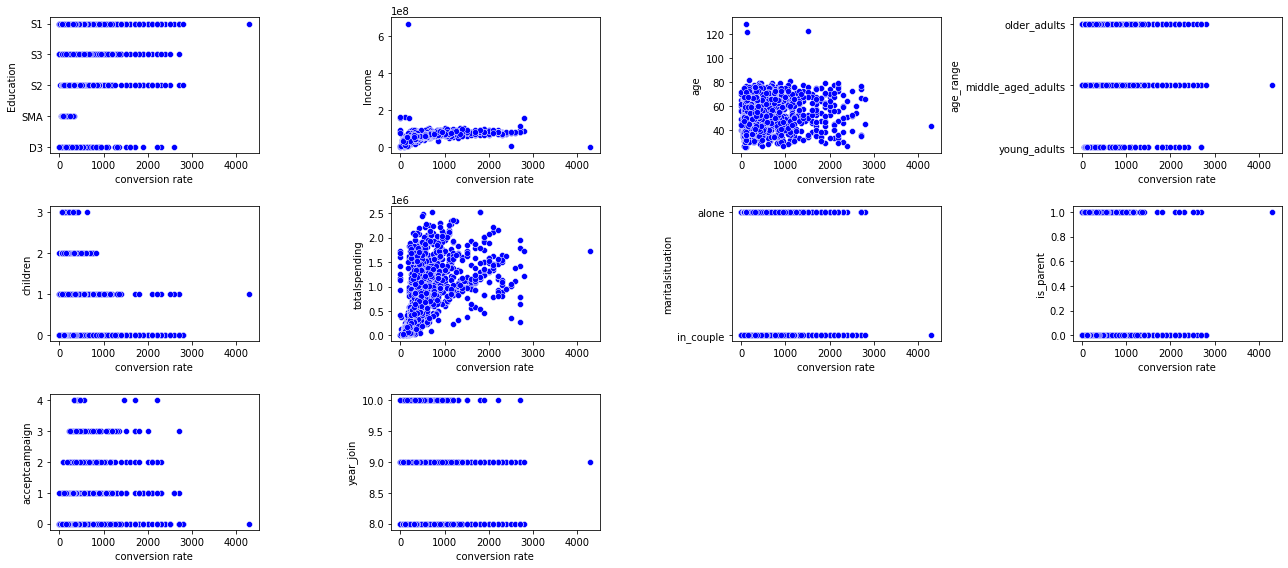

In [ ]:
#scatterplot
plt.figure(figsize=(18, 8))
for i in range(0, len(cats)):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=df1['conversionrate'], y=df1[cats[i]], color='blue')
    plt.xlabel('conversion rate')
    plt.tight_layout()

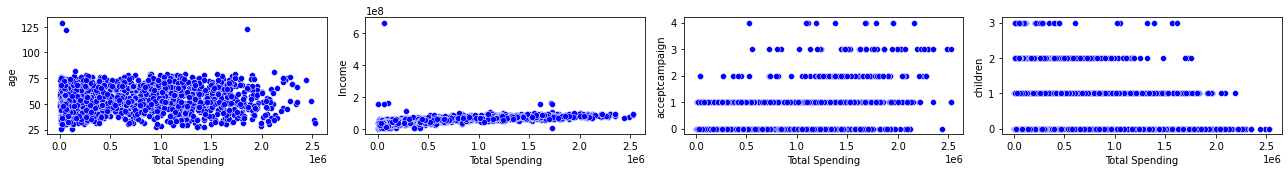

In [ ]:
cats2=['age', 'Income', 'acceptcampaign', 'children']
plt.figure(figsize=(18, 2.5))
for i in range(0, len(cats2)):
    plt.subplot(1, 4, i+1)
    sns.scatterplot(x=df1['totalspending'], y=df1[cats2[i]], color='blue')
    plt.xlabel('Total Spending')
    plt.tight_layout()

Insights
- There is linear positive correlation between conversion rate variable and income variable. The higher the income, the higher the conversion rate.
- There is linear positive correlation between conversion rate variable and total spending variable. The more amount spend, the higher the conversion rate.
- The correlation between conversion rate and age variabel is less significant because the conversion rate distribution in age variable tend to be average.
- There is also less significant correlation between total spending and age variable because the total spending distribution in age variable tend to be average.
- There is linear positive correlation between total spending variable and income variable.


## Multivariate analysis

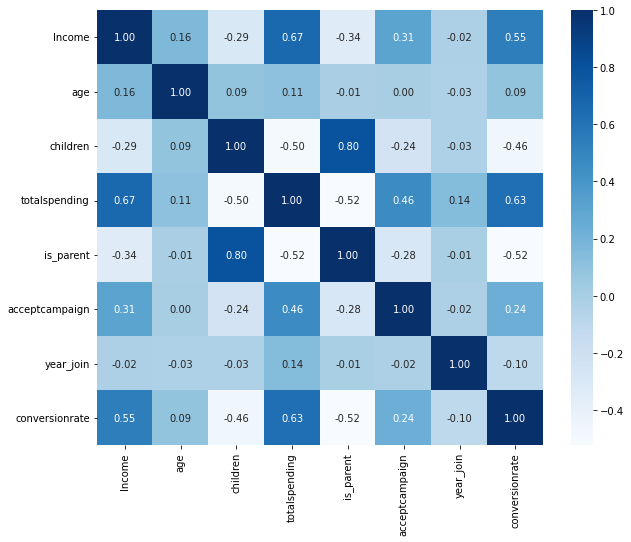

In [ ]:
cats2= ['Income', 'age', 'children', 'totalspending', 'is_parent', 'acceptcampaign', 'year_join', 'conversionrate']
plt.figure(figsize=(10, 8))
sns.heatmap(df1[cats2].corr(), cmap='Blues', annot=True, fmt='.2f')

Insights 
- There is strong correlation between total spending and income variable
- There is strong correlation between total spending and conversion rate variable
- There is strong correlation between income and conversion rate variable

# Data Preprocessing

## Handle null values

In [ ]:
# Subtask 1 : handle null and duplicated values
#cek jumlah null value pada dataset
df1.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
age                     0
children                0
totalspending           0
totaltransaction        0
conversionrate          2
maritalsituation        0
is_parent               0
acceptcampaign          0
year_join   

In [ ]:
#drop missing value pada kolom income dan conversion rate karena jumlah tidak signifikan
df2=df1.copy()
df2=df2.dropna(subset=['Income','conversionrate'])

## Handle duplicated values

In [ ]:
# drop duplicated rows
print(f'jumlah row duplicated adalah {df2.duplicated().sum()}')

jumlah row duplicated adalah 0


## Feature encoding

In [ ]:
# Subtask 3 : membuat feature encoding
for col in categorical:
    print(f'''value count kolom {col}:''')
    print(df2[col].value_counts())
    print('\n')

value count kolom Education:
S1     1115
S3      480
S2      365
D3      200
SMA      54
Name: Education, dtype: int64


value count kolom Marital_Status:
Menikah        856
Bertunangan    573
Lajang         475
Cerai          231
Janda           76
Duda             3
Name: Marital_Status, dtype: int64


value count kolom AcceptedCmp3:
0    2051
1     163
Name: AcceptedCmp3, dtype: int64


value count kolom AcceptedCmp4:
0    2050
1     164
Name: AcceptedCmp4, dtype: int64


value count kolom AcceptedCmp5:
0    2052
1     162
Name: AcceptedCmp5, dtype: int64


value count kolom AcceptedCmp1:
0    2072
1     142
Name: AcceptedCmp1, dtype: int64


value count kolom AcceptedCmp2:
0    2184
1      30
Name: AcceptedCmp2, dtype: int64


value count kolom Complain:
0    2193
1      21
Name: Complain, dtype: int64


value count kolom Response:
0    1881
1     333
Name: Response, dtype: int64


value count kolom maritalsituation:
in_couple    1429
alone         785
Name: maritalsituation, dtype

Strategy:
- `maritalsituation`, `age_group`, `Marital_Status` : one hot encoding
- `Education` : label encoding

In [ ]:
# label encoder
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4}

df2['education_mapped'] = df2['Education'].map(mapping_education)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
# handle dengan one hot encoding
for cat in ['maritalsituation', 'age_range', 'Marital_Status']:
    onehots = pd.get_dummies(df2[cat], prefix=cat)
    df2 = df2.join(onehots)

## Feature selection

In [ ]:
# Subtask 2 : membuang data yang tidak diperlukan
df2.drop(columns=['Unnamed: 0','ID','AcceptedCmp3', 'AcceptedCmp4', 
                  'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2'], inplace=True)

## Standardization

In [ ]:
# Subtask 4 : melakukan standarisasi

from sklearn.preprocessing import StandardScaler
df2_scaled = df2.copy()
ss = StandardScaler()

for col in numerical:
    df2_scaled[col] = ss.fit_transform(df2_scaled[[col]])
    
display(df2_scaled.shape, df2_scaled.head(3))

(2214, 45)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,age,children,totalspending,totaltransaction,conversionrate,maritalsituation,is_parent,acceptcampaign,year_join,age_range,education_mapped,maritalsituation_alone,maritalsituation_in_couple,age_range_middle_aged_adults,age_range_older_adults,age_range_young_adults,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,-0.987181,S1,Lajang,0.239484,-0.823663,-0.929754,-1.974260,0.311647,0.977329,1.548439,1.689213,2.453352,1.483854,0.849162,0.350695,1.427997,2.503700,-0.556305,0.692445,0,0.0,0.0,1,0.987181,-1.266290,1.674583,1.319344,-0.168427,alone,0,-0.439502,1.499725,older_adults,2,1,0,0,1,0,0,0,0,0,1,0
1,-1.237595,S1,Lajang,-0.232524,1.039044,0.908171,1.666066,-0.379515,-0.872763,-0.637733,-0.718505,-0.651480,-0.634282,-0.733513,-0.169358,-1.127852,-0.571864,-1.172290,-0.133787,0,0.0,0.0,0,1.237595,1.405045,-0.963254,-1.161193,-0.653566,alone,1,-0.439502,-1.418018,older_adults,2,1,0,0,1,0,0,0,0,0,1,0
2,-0.319409,S1,Bertunangan,0.778768,-0.823663,-0.929754,0.172930,-0.794212,0.357667,0.568431,-0.178998,1.339265,-0.147354,-0.038680,-0.689411,1.427997,-0.230135,1.291647,-0.546903,0,0.0,0.0,0,0.319409,-1.266290,0.279350,0.797126,0.174970,in_couple,0,-0.439502,0.040854,older_adults,2,0,1,0,1,0,1,0,0,0,0,0


In [ ]:
df2_scaled.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,age,children,totalspending,totaltransaction,conversionrate,is_parent,acceptcampaign,year_join,education_mapped,maritalsituation_alone,maritalsituation_in_couple,age_range_middle_aged_adults,age_range_older_adults,age_range_young_adults,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
count,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2214.000000,2214.0,2214.0,2214.000000,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2214.000000,2.214000e+03,2.214000e+03,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000
mean,-5.122872e-16,-6.177935e-17,6.097702e-17,-5.455839e-17,3.421132e-15,6.739565e-17,7.381429e-17,-4.653509e-17,-7.060497e-17,5.295373e-17,2.888385e-17,1.444193e-17,-4.653509e-17,9.948882e-17,-2.246522e-17,6.579099e-17,3.209317e-18,0.009485,0.0,0.0,0.150407,-8.785505e-17,-2.888385e-17,6.258168e-17,-2.487221e-17,-4.172112e-17,0.714995,6.338401e-17,3.173212e-16,2.459350,0.354562,0.645438,0.508582,0.425474,0.065944,0.258808,0.104336,0.001355,0.034327,0.214544,0.386631
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,0.096950,0.0,0.0,0.357550,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,0.451519,1.000226e+00,1.000226e+00,1.004698,0.478488,0.478488,0.500039,0.494526,0.248240,0.438079,0.305765,0.036794,0.182109,0.410598,0.487088
min,-6.329357e+00,-2.018023e+00,-8.236630e-01,-9.297542e-01,-2.370135e+00,-1.692722e+00,-9.053763e-01,-6.628610e-01,-7.452577e-01,-6.880076e-01,-6.586279e-01,-8.493188e-01,-1.209464e+00,-1.492973e+00,-9.135935e-01,-1.788274e+00,-2.199366e+00,0.000000,0.0,0.0,0.000000,-2.268208e+00,-1.266290e+00,-9.997525e-01,-1.944520e+00,-8.990584e-01,0.000000,-4.395016e-01,-1.418018e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.202376e-01,-6.759174e-01,-8.236630e-01,-9.297542e-01,-7.479090e-01,-8.633279e-01,-8.342190e-01,-6.126042e-01,-6.739179e-01,-6.332165e-01,-6.342815e-01,-6.756106e-01,-6.894107e-01,-7.627306e-01,-9.135935e-01,-8.642976e-01,-9.600187e-01,0.000000,0.0,0.0,0.000000,-6.822495e-01,-1.266290e+00,-8.935754e-01,-9.000837e-01,-6.433373e-01,0.000000,-4.395016e-01,4.085368e-02,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.794895e-02,-3.133838e-02,-8.236630e-01,-9.297542e-01,-3.492532e-03,6.243557e-04,-3.850380e-01,-4.618338e-01,-4.420635e-01,-4.688430e-01,-4.638569e-01,-3.667959e-01,-1.693578e-01,-3.248820e-02,-2.301348e-01,-2.483134e-01,2.793291e-01,0.000000,0.0,0.0,0.000000,-9.794895e-02,6.937747e-02,-3.494179e-01,1.379845e-02,-3.620441e-01,1.000000,-4.395016e-01,4.085368e-02,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.822495e-01,6.534117e-01,1.039044e+00,9.081706e-01,7.409240e-01,8.645766e-01,5.918934e-01,1.663764e-01,2.925135e-01,2.251783e-01,1.448027e-01,2.315325e-01,3.506951e-01,6.977542e-01,4.533239e-01,6.756629e-01,6.924450e-01,0.000000,0.0,0.0,0.000000,8.202376e-01,6.937747e-02,7.306021e-01,7.971260e-01,2.056568e-01,1.000000,-4.395016e-01,4.085368e-02,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.268208e+00,2

# Data Modeling

## Elbow method

[4428.000000000004, 1734.4383865225038, 1165.4649263424253, 743.2631379864971, 528.5875987644674, 438.40150959603625, 379.14993760344123, 328.12064817326643, 292.5083627991654]


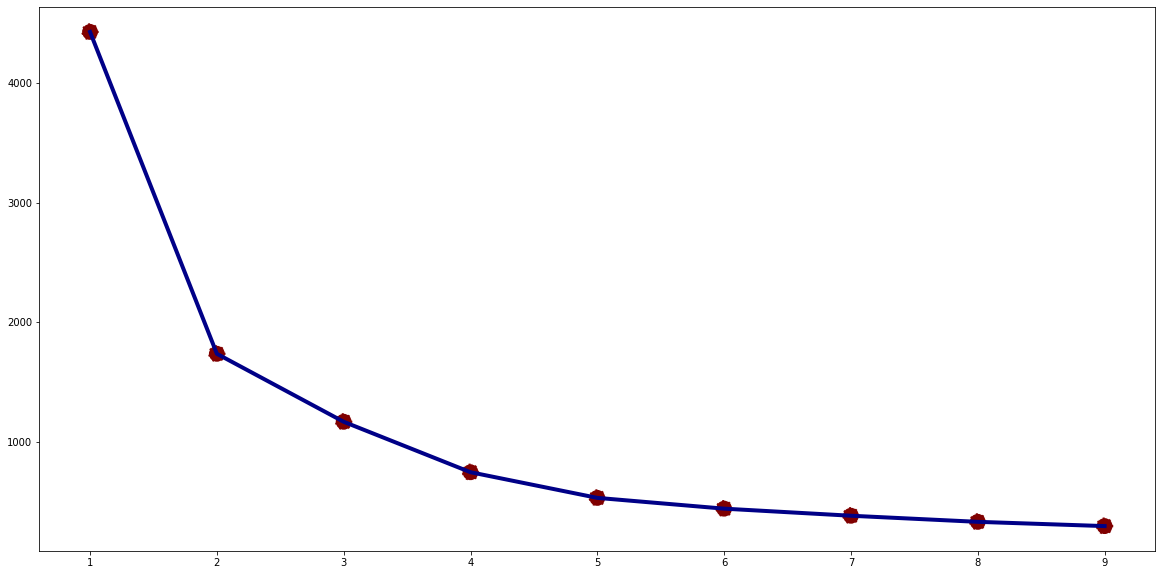

In [ ]:
# use elbow method to calculate the best number for clusters
from sklearn.cluster import KMeans

col_model=['Income', 'totalspending']
X=df2_scaled[col_model].copy()
inertia = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)


print(inertia)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 10), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 10), y=inertia, s=300, color='#800000',  linestyle='--')

The number of optimal cluster according to elbow method = 4

## Kmeans modeling

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df2_scaled['cluster'] = kmeans.labels_
df2['cluster'] = kmeans.labels_

In [ ]:
X.sample(5)

,Income,totalspending,cluster
313,0.749952,1.493750,1
1870,-1.021019,-0.938369,0
101,-0.704372,-0.916802,0
1536,-1.716865,-0.971549,0
110,1.006287,0.599540,2


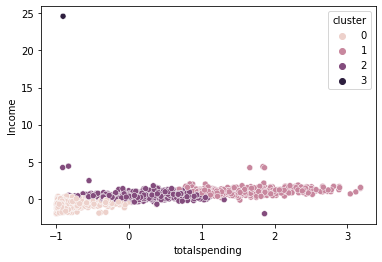

In [ ]:
sns.scatterplot(data=X, x='totalspending', y='Income', hue='cluster')

## Silhouette score

In [ ]:
# silhouette score
import sklearn.metrics as metrics
import sklearn.cluster as cluster

for i in range(2,11):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.6676071449703822
Silhouette score for k(clusters) = 3 is 0.6768581649030202
Silhouette score for k(clusters) = 4 is 0.6768581649030202
Silhouette score for k(clusters) = 5 is 0.5243113042221086
Silhouette score for k(clusters) = 6 is 0.46424799107576836
Silhouette score for k(clusters) = 7 is 0.4494485079948396
Silhouette score for k(clusters) = 8 is 0.42639916704293795
Silhouette score for k(clusters) = 9 is 0.42503715234200184
Silhouette score for k(clusters) = 10 is 0.41952889659998244


In [ ]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,11)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=200)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

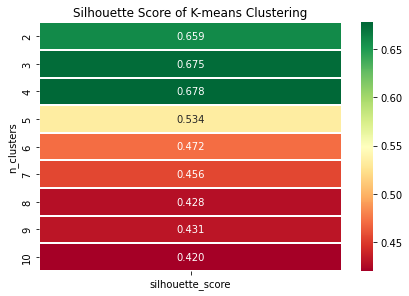

In [ ]:
visualize_silhouette_layer(X)

In [ ]:
display(df2.groupby('cluster')['totalspending','Income'].agg(['count','mean']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


totalspending               Income              
                count          mean  count          mean
cluster                                                 
0                1122  1.258191e+05   1122  3.478553e+07
1                 449  1.573203e+06    449  7.828739e+07
2                 642  7.751807e+05    642  6.327413e+07
3                   1  6.200000e+04      1  6.666660e+08

Based on silhouette score, the highest score is 3 and 4 clusters. After further analysis, the 4th cluster have unsuitable distribution and value which most likely to be an outlier. Therefore, we decided to drop the 4th cluster. The final number of cluster is 3.

In [ ]:
# drop row untuk nilai cluster = 3
df2 = df2[df2.cluster != 3]

# Potential impact

## Cluster identification based on income and total amount spend

In [ ]:
display(df2.groupby('cluster')['Income','totalspending'].agg(['count','mean','median']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Income                           totalspending                \
         count          mean      median         count          mean   
cluster                                                                
0         1122  3.478553e+07  35683000.0          1122  1.258191e+05   
1          449  7.828739e+07  78093000.0           449  1.573203e+06   
2          642  6.327413e+07  62559500.0           642  7.751807e+05   

                    
            median  
cluster             
0          70000.0  
1        1529000.0  
2         795000.0

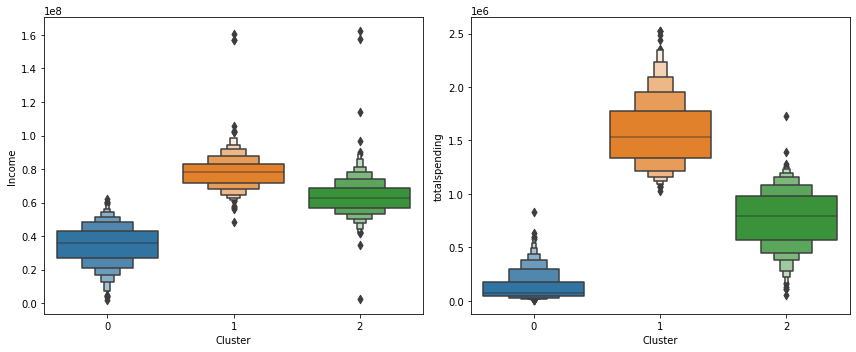

In [ ]:
#boxplot

cluster_cats=['Income','totalspending']
plt.figure(figsize=(12, 5))
for i in range(0, len(cluster_cats)):
    plt.subplot(1, 2, i+1)
    sns.boxenplot(x=df2['cluster'], y=df2[cluster_cats[i]])
    plt.xlabel('Cluster')
    plt.tight_layout()

1. Cluster 0 
- Have the lowest income based on its cluster which is by median is 35.683.000 per year
- Also the lowest total amount spend by which is 70.000
- Then categorized as <b> low spender </b>
2. Cluster 1
- Have the highest income 78.093.000 per year
- Have the highest amount of total spending which is 1.529.000
- Then categorized as <b>high spender</b>
3. Cluster 2
- Have the second highest income which is 62.559.500 per year
- Also the second highest total spending which is 795.000
- Then categorized as <b>mid spender</b>


In [ ]:
map_cluster = {
    0 : 'Low Spender',
    1 : 'High Spender',
    2 : 'Mid Spender'
}

df2['cluster_mapped'] = df2['cluster'].map(map_cluster)

## Customer profile based on clusters

In [ ]:
display(df2.groupby('cluster_mapped')['age','children'].describe())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


age                                                        \
                 count       mean        std   min    25%   50%   75%    max   
cluster_mapped                                                                 
High Spender     449.0  53.868597  13.410854  27.0  44.00  53.0  64.0  123.0   
Low Spender     1122.0  51.228164  11.509744  26.0  43.25  50.0  59.0  129.0   
Mid Spender      642.0  56.099688  11.077490  27.0  47.00  56.0  66.0   79.0   

               children                                               
                  count      mean       std  min  25%  50%  75%  max  
cluster_mapped                                                        
High Spender      449.0  0.293987  0.549338  0.0  0.0  0.0  1.0  3.0  
Low Spender      1122.0  1.224599  0.701344  0.0  1.0  1.0  2.0  3.0  
Mid Spender       642.0  0.922118  0.656310  0.0  1.0  1.0  1.0  3.0

In [ ]:
display(df2.groupby('cluster_mapped')['Education','Marital_Status','age_range'].describe())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Education                 Marital_Status                       \
                   count unique top freq          count unique      top freq   
cluster_mapped                                                                 
High Spender         449      4  S1  234            449      5  Menikah  164   
Low Spender         1122      5  S1  551           1122      6  Menikah  434   
Mid Spender          642      5  S1  329            642      6  Menikah  258   

               age_range                                  
                   count unique                 top freq  
cluster_mapped                                            
High Spender         449      3        older_adults  214  
Low Spender         1122      3  middle_aged_adults  662  
Mid Spender          642      3        older_adults  344

- Low spender category mostly are middle aged adults (36-55 years old), have married and have 1 kids. 
- Mid spender category are in older adults (>55 years old), have married and have 1 kids
- High spender are older adults (>55 years old), have married and have no kids.


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

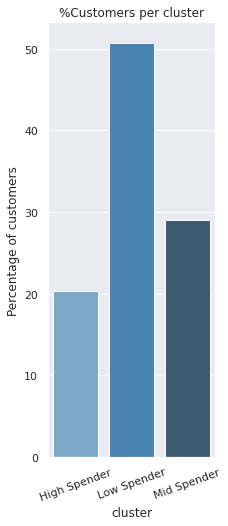

In [ ]:
b=df2.groupby('cluster_mapped')[('age_range')].agg(['count']).reset_index()
b.columns=['cluster','total']
b['pct']=round(b['total']*100/(1122+449+642),2)

sns.set(rc={'figure.figsize':(3,8)})
sns.barplot(x='cluster', y='pct', data=b, palette='Blues_d')
plt.title('%Customers per cluster')
plt.ylabel('Percentage of customers')
plt.xticks(rotation=20)

Most customers (half of the population -> 50,7%) are categorized as low spender which have the lowest average amount of income and total spend  

## Customer based on total visit web

In [ ]:
display(df2.groupby('cluster_mapped')['NumWebVisitsMonth'].agg(['mean','median']))

,mean,median
cluster_mapped,,
High Spender,3.220490,3.0
Low Spender,6.529412,7.0
Mid Spender,4.686916,5.0


Text(0.5, 1.0, 'Total Visit Web per Cluster')

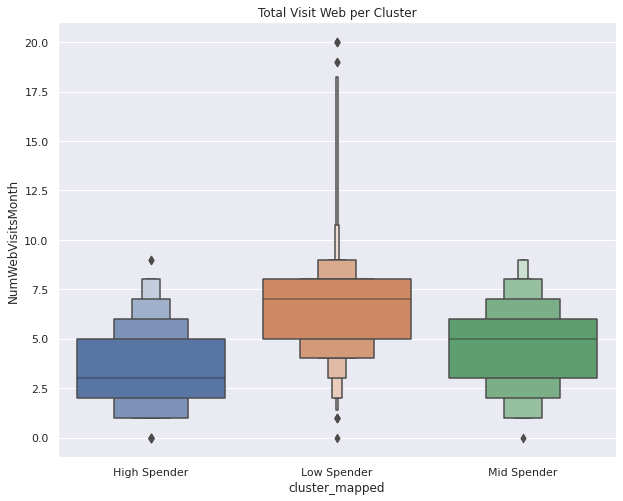

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxenplot(x=df2['cluster_mapped'], y=df2['NumWebVisitsMonth'])
plt.title('Total Visit Web per Cluster')

Low spender category have the highest amount of total web visit which is 6-7 times per month. Meanwhile high spender have the lowest amount which is by average 3 times per month.

## Customer based on Purchasing history

In [ ]:
display(df2.groupby('cluster_mapped')['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'].agg(['mean','median']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


NumDealsPurchases        NumWebPurchases         \
                            mean median            mean median   
cluster_mapped                                                   
High Spender            1.516704    1.0        5.396437    5.0   
Low Spender             2.269162    2.0        2.474153    2.0   
Mid Spender             2.987539    2.0        5.998442    6.0   

               NumCatalogPurchases        NumStorePurchases         
                              mean median              mean median  
cluster_mapped                                                      
High Spender              6.146993    6.0          8.334076    8.0  
Low Spender               0.662210    0.0          3.427807    3.0  
Mid Spender               3.761682    3.0          8.199377    8.0

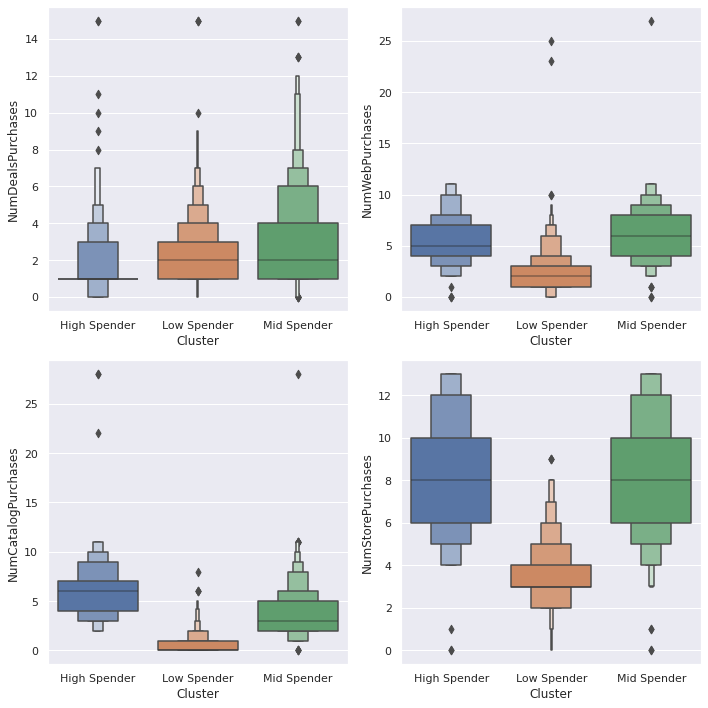

In [ ]:
#boxplot

purchase_cats=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
plt.figure(figsize=(10, 10))
for i in range(0, len(purchase_cats)):
    plt.subplot(2, 2, i+1)
    sns.boxenplot(x=df2['cluster_mapped'], y=df2[purchase_cats[i]])
    plt.xlabel('Cluster')
    plt.tight_layout()

- Low spender and mid spender category are highest deals user and approximately used promo for 2 times per month
- The most web purchase is by mid spender then followed by high spender
- High spender category are mostlikely to purchase by catalog purchase meanwhile low spender by avg have 0 purchase by catalog
- Both high spender and mid spender have the most purchase by store which by avg 8 times per month

## Customer based on total campaign

Text(0.5, 1.0, 'Accepted campaign per Cluster')

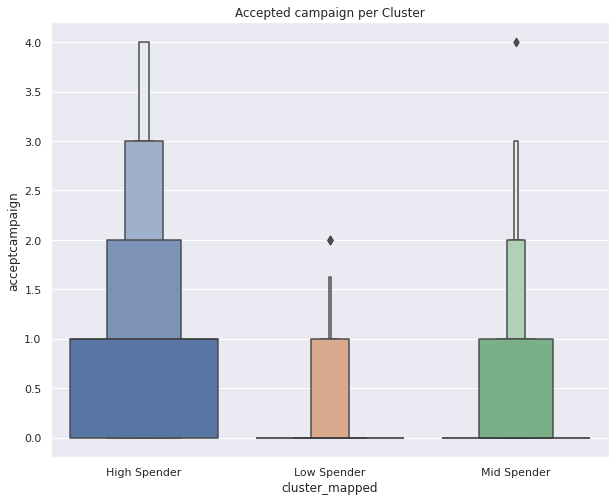

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxenplot(x=df2['cluster_mapped'], y=df2['acceptcampaign'])
plt.title('Accepted campaign per Cluster')

High spender is category that most likely to accept campaign where at least accepting 1 campaign. Meanwhile most users in low spender and mid spender are not following any campaign (avg 0 campaign)

## Summary

In [ ]:
c=df2.groupby('cluster_mapped')['Income','totalspending'].agg(['median']).reset_index()
c.columns=['cluster','income','totalspending']
c['spending pct']= round(c['totalspending']*100/c['income'],2)
c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cluster,income,totalspending,spending pct
0,High Spender,78093000.0,1529000.0,1.96
1,Low Spender,35683000.0,70000.0,0.20
2,Mid Spender,62559500.0,795000.0,1.27


<b> Karakteristik customer </b>
1. Low Spender
- Most of the customers in this category are middle aged adults (36-55 years old), have married and have 1 kids. Half of the customers are low spender customers 
- Have the most web visit which approx 6-7 times per month but have the least amount of purchase by web (2 times)
- Most of the customer are not accepting any campaign
- Using deals promo at least 2 times per month
- Have the lowest rate of income and total spending amount

2. Mid Spender
- Most of the customers are in older adults age (>55 years old), have married and have 1 kids
- They have the highest number of web purchase (6 times) eventhough visited web 4-5 times per month 
- Also have high amount of purchase by store at least 8 times
- Mid spender are using deals promo at least 2 times per month and doesnt accept any campaign
- Have high amount of income around 62 mios but have low total spending amount which only 795.000 or 1.27% percent of their income
3. High Spender
- Most of the customers are an older adults (>55 years old), have married and have no kids.
- Have the highest amount of purchasing history by store and catalog. Both at least 8 times
- They have high number of web purchase (5 times) despite the low number of web visits which only 3 times per month.
- Accepting at least 1 campaign and used deals promo at least 1 times.
- Have the highest rate of income and total spending amount

## Business recomendation

1. Identify why low spender category have low purchase in web eventhough they have the highest number of web visit. This could probably happened because of uncomplete product category, unsuitable product price, high shipping cost, high service cost, etc. 

2. Increase the purchasing service by store, where most of customers from three categories are most likely to shop by store.

3. Develop features in web purchase to increase the number of web visits particularly for high spender category who have high amount of web purchase but lowest amount of web visit. Feature that are recomended to be added are =
- Clicked ads to increase the number of web visits
- Product recommender to increase purchasing service using web

4. Give rewards for certain amount of spending by giving coupon or voucher to customers especially for mid spender category who have high number of deals purchased but low amount of total spending.

## Potential impact

In [ ]:
d=df2.groupby('cluster_mapped')['totalspending'].agg(['sum']).reset_index()
d

,cluster_mapped,sum
0,High Spender,706368000
1,Low Spender,141169000
2,Mid Spender,497666000


Text(0, 0.5, 'Total spending')

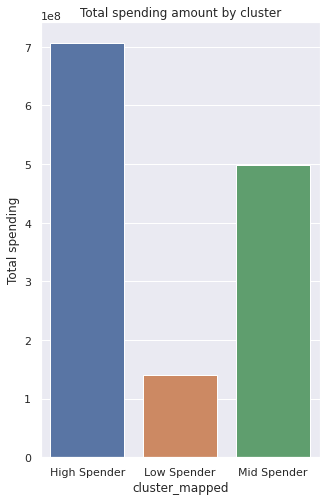

In [ ]:
# buat figure
plt.figure(figsize=(5,8))
sns.barplot(x='cluster_mapped',y='sum', data=d)
plt.title('Total spending amount by cluster')
plt.ylabel('Total spending')

Based on analyses, the market retargetting is focussed to high spender and mid spender category who have high amount of income where have more potential to do more spending compared to other category. 
- High spender have potential GMV for IDR 706.368.000
- Mid spender have potential GMV for IDR 497.666.000
- The amount of potential reduction cost to do promo optimization for mid spender category (assume the 50% reduction) is IDR 70.978.836

In [ ]:
# jumlah yang dapat di save jika dapat optimasi promo cost (asumsi: target reduce 50%)
(df2[df2.cluster == 2].totalspending.sum() / df2[df2.cluster == 2].totaltransaction.sum()) * df2[df2.cluster == 2].NumDealsPurchases.sum()

70978836.10945866